<a href="https://colab.research.google.com/github/yeesem/Soft-Computing/blob/main/Tutorial_10_Genetic_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.2 MB/s eta 0:00:00


In [2]:
import operator
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from deap import base, creator, gp, tools, algorithms

In [3]:
# Define the dataset
x = np.linspace(-1,1,100)
y = np.sin(x) + np.random.normal(0,0.1,size = len(x))

In [4]:
# Define the evaluation function
def eval_sine(individual,x):
  # Compile the expression
  func = toolbox.compile(expr = individual)
  # Evaluate the expression on the data points
  y_pred = [func(xi) for xi in x]
  # Calculate Mean Squared Error (MSE)
  return np.mean((y_pred - y) ** 2),

In [5]:
# Create a primitive set for GP
pset = gp.PrimitiveSet("MAIN",arity = 1)
# Arity is 2 because it takes two arguments: the numbers to be added together.
pset.addPrimitive(np.add,arity = 2)
pset.addPrimitive(np.subtract,arity = 2)
pset.addPrimitive(np.multiply,arity = 2)
pset.addPrimitive(np.divide,arity = 2)
pset.addPrimitive(np.sin,arity = 1)
pset.addPrimitive(np.cos,arity = 1)
pset.addPrimitive(np.exp,arity = 1)
pset.addPrimitive(np.sqrt,arity = 1)
pset.addPrimitive(np.abs,arity = 1)
pset.addPrimitive(np.square,arity = 1)
# addEphemeralConstant - Used to add a constant value to the primitive set.
pset.addEphemeralConstant("rand",lambda : random.uniform(-1,1))

# Define the type of the individual (program) and the fitness
# weights=(-1.0,) argument specifies the weights for the fitness evaluation.
# In this case, -1.0 indicates that lower fitness values are better. This implies
# that during the evolution process, individuals with lower fitness values
# (closer to zero or negative) are considered better or more fit.
creator.create("FitnessMin",base.Fitness,weights = (-1.0,))
# gp.PrimitiveTree: This specifies the base class or type from which the "Individual"
# class will inherit its behavior. In Genetic Programming, individuals are often represented
# as tree structures, where each node in the tree represents a function or terminal value.
creator.create("Individual",gp.PrimitiveTree,fitness = creator.FitnessMin)

# Create the toolbox
toolbox = base.Toolbox()
toolbox.register("expr",gp.genHalfAndHalf,pset = pset,min_ = 1,max_ = 3)
# initIterate is a function in the tools module used to create individuals
# (also known as programs or solutions) for the evolutionary process. It creates
# an individual by repeatedly applying a given function (provided as the third argument)
# a specified number of times (provided as the fourth argument).

# Individual is a custom class created using creator to represent individuals
# in the genetic programming context. It represents an individual as a tree-like
# structure composed of nodes and primitives.
# Individual is get from the creator object
toolbox.register('individual',tools.initIterate,creator.Individual,toolbox.expr)
# initRepeat is a function in the tools module used to create a population of individuals
# for the evolutionary process. It initializes the population by repeating a given function
# (provided as the third argument) a specified number of times (provided as the second argument).

# List - It's used here as the container type for the population, indicating that the population
# will be a list of individuals.
toolbox.register('population',tools.initRepeat,list,toolbox.individual)
# Compile is a function in the gp module used to compile a symbolic expression tree into executable
# Python code.
# pset specifies the primitive set (pset) that will be used for compiling the expressions.
# The primitive set defines the set of functions and terminals that can appear in the expressions.
toolbox.register('compile',gp.compile,pset = pset)
# x that will be used by the evaluation function. The exact meaning of x depends on the context of your code.
# It could be a dataset or some other input required for the evaluation function eval_sine.
toolbox.register('evaluate',eval_sine,x = x)
toolbox.register('mate',gp.cxOnePoint)
toolbox.register('mutate',gp.mutNodeReplacement,pset = pset)
toolbox.register('select',tools.selTournament,tournsize = 3)

# Set limits for tree depth
toolbox.decorate('mate',gp.staticLimit(key = operator.attrgetter("height"),max_value = 15))
toolbox.decorate("mutate",gp.staticLimit(key = operator.attrgetter("height"),max_value = 15))

/usr/local/lib/python3.10/dist-packages/deap/gp.py:254: RuntimeWarning: Ephemeral rand function cannot be pickled because its generating function is a lambda function. Use functools.partial instead.
  warnings.warn("Ephemeral {name} function cannot be "


<string>:1: RuntimeWarning: invalid value encountered in sqrt
<string>:1: RuntimeWarning: divide by zero encountered in divide


Best Expression:  [-0.8414709848078965, -0.8303848237381118, -0.8189597761944479, -0.8072005048272394, -0.7951118086861494, -0.7826986212616418, -0.7699660084715846, -0.7569191665938099, -0.7435634201454725, -0.7299042197100738, -0.7159471397130358, -0.7016978761467353, -0.6871622442459252, -0.6723461761144925, -0.6572557183045205, -0.6418970293486437, -0.6262763772467038, -0.6104001369077301, -0.5942747875482894, -0.5779069100482682, -0.5613031842651642, -0.5444703863079849, -0.5274153857718655, -0.5101451429345328, -0.4926667059157635, -0.47498720780099063, -0.45711386373023705, -0.43905396795356066, -0.4208148908542143, -0.40240407594073574, -0.38382903680919367, -0.36509735407683147, -0.34621667228835856, -0.32719469679615215, -0.30803919061564394, -0.28875797125717273, -0.2693589075355986, -0.249849916358978, -0.2302389594976129, -0.21053404033479037, -0.19074320060054, -0.17087451708974163, -0.15093609836592292, -0.13093608145209135, -0.11088262850995292, -0.09078392350887028, -0

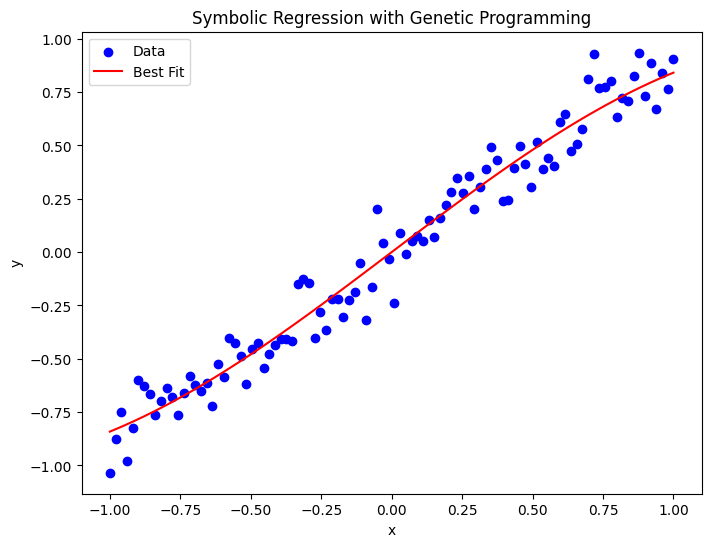

In [12]:
# Define parameters
population_size = 100
generations = 50
cxpb = 0.7
mutpb = 0.3

# Initialize population
population = toolbox.population(n = population_size)

# Run the evolution
for gen in range(generations):
    # algorithms.varAnd: This function is a variation operator that applies crossover
    # and mutation to a population. It stands for "variation AND", meaning that both
    # crossover and mutation will be applied to the population.
    offspring = algorithms.varAnd(population,toolbox,cxpb = cxpb,mutpb = mutpb)
    fitnesses = toolbox.map(toolbox.evaluate,offspring)
    # ind.fitness.values = fit assigns the computed fitness value (fit) to the individual's fitness attribute.
    for ind,fit in zip(offspring,fitnesses):
      ind.fitness.values = fit
    population = toolbox.select(offspring,k = len(population))

# Get the best individual
best_individual = tools.selBest(population,k=1)[0]
best_expression = toolbox.compile(expr = best_individual)
print("Best Expression: ",[best_expression(xi) for xi in x])

# Plot the best individual
plt.figure(figsize = (8,6))
plt.scatter(x,y,color = 'blue',label = 'Data')
plt.plot(x,[best_expression(xi) for xi in x],color = 'red',label = 'Best Fit')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Symbolic Regression with Genetic Programming")
plt.show()

In [7]:
population_sizes = [50,100,200]
num_generations = [50,100,200]
crossover_probs = [0.5,0.7,0.9]
mutation_probs = [0.1,0.3,0.5]

In [8]:
def runGP(popsize,maxgen,rate_cr,rate_mu):
  population = toolbox.population(n = popsize)
  record_fitness = {
      'bestfit' : [],
      'avgfit' : [],
      'generation' : []
  }

  # Run the evaluation
  for gen in range(maxgen):
    offspring = algorithms.varAnd(population,toolbox,cxpb = rate_cr,mutpb = rate_mu)
    fitnesses = toolbox.map(toolbox.evaluate,offspring)

    fit_total = 0
    for ind,fit in zip(offspring,fitnesses):
      ind.fitness.values = fit
      fit_total += fit[0]

    population = toolbox.select(offspring,k = len(population))

    record_fitness['bestfit'] += [tools.selBest(population,k=1)[0].fitness.values[0]]
    record_fitness['avgfit'] += [fit_total/popsize]
    record_fitness['generation'] += [gen]

  return population,record_fitness

In [9]:
def get_results(population_sizes,num_generations,crossover_probs,mutation_probs,show = True):
    results = {
        'bestindividual':[],
        'bestfitness':[],
        'avgfitness':[],
        'progression':[],
        'popsize':[],
        'generations':[],
        'crossover':[],
        'mutation':[]
    }

    for popsize in population_sizes:
      for maxgen in num_generations:
        for rate_cr in crossover_probs:
          for rate_mu in mutation_probs:

            if show == True:
              print("Running for popsize {}, maxgen {}, cro {}, mut {}".format(popsize,maxgen,rate_cr,rate_mu))

            population,record_fitness = runGP(popsize,maxgen,rate_cr,rate_mu)

            # Get the best individual and its fitness
            results['bestindividual'] += [tools.selBest(population,k=1)[0]]
            results['bestfitness'] += [results['bestindividual'][-1].fitness.values[0]]

            results['progression'] += [record_fitness]

            # Average fitness
            total_fitness = 0.0
            for ind in population:
              total_fitness += ind.fitness.values[0]
            results['avgfitness'] += [total_fitness / len(population)]

            results['popsize'] += ['popsize']
            results['generations'] += [maxgen]
            results['crossover'] += [rate_cr]
            results['mutation'] += [rate_mu]

    return results

results = get_results(population_sizes,num_generations,crossover_probs,mutation_probs,True)

print("\n")
print(results)

Running for popsize 50, maxgen 50, cro 0.5, mut 0.1


<string>:1: RuntimeWarning: divide by zero encountered in divide


Running for popsize 50, maxgen 50, cro 0.5, mut 0.3
Running for popsize 50, maxgen 50, cro 0.5, mut 0.5
Running for popsize 50, maxgen 50, cro 0.7, mut 0.1
Running for popsize 50, maxgen 50, cro 0.7, mut 0.3
Running for popsize 50, maxgen 50, cro 0.7, mut 0.5


<string>:1: RuntimeWarning: invalid value encountered in divide


Running for popsize 50, maxgen 50, cro 0.9, mut 0.1
Running for popsize 50, maxgen 50, cro 0.9, mut 0.3


<string>:1: RuntimeWarning: invalid value encountered in sin


Running for popsize 50, maxgen 50, cro 0.9, mut 0.5


<string>:1: RuntimeWarning: overflow encountered in exp


Running for popsize 50, maxgen 100, cro 0.5, mut 0.1
Running for popsize 50, maxgen 100, cro 0.5, mut 0.3
Running for popsize 50, maxgen 100, cro 0.5, mut 0.5
Running for popsize 50, maxgen 100, cro 0.7, mut 0.1
Running for popsize 50, maxgen 100, cro 0.7, mut 0.3
Running for popsize 50, maxgen 100, cro 0.7, mut 0.5
Running for popsize 50, maxgen 100, cro 0.9, mut 0.1
Running for popsize 50, maxgen 100, cro 0.9, mut 0.3
Running for popsize 50, maxgen 100, cro 0.9, mut 0.5
Running for popsize 50, maxgen 200, cro 0.5, mut 0.1
Running for popsize 50, maxgen 200, cro 0.5, mut 0.3
Running for popsize 50, maxgen 200, cro 0.5, mut 0.5
Running for popsize 50, maxgen 200, cro 0.7, mut 0.1
Running for popsize 50, maxgen 200, cro 0.7, mut 0.3
Running for popsize 50, maxgen 200, cro 0.7, mut 0.5
Running for popsize 50, maxgen 200, cro 0.9, mut 0.1
Running for popsize 50, maxgen 200, cro 0.9, mut 0.3
Running for popsize 50, maxgen 200, cro 0.9, mut 0.5
Running for popsize 100, maxgen 50, cro 0.5, m

<string>:1: RuntimeWarning: invalid value encountered in cos


Running for popsize 100, maxgen 50, cro 0.7, mut 0.5
Running for popsize 100, maxgen 50, cro 0.9, mut 0.1
Running for popsize 100, maxgen 50, cro 0.9, mut 0.3
Running for popsize 100, maxgen 50, cro 0.9, mut 0.5
Running for popsize 100, maxgen 100, cro 0.5, mut 0.1
Running for popsize 100, maxgen 100, cro 0.5, mut 0.3
Running for popsize 100, maxgen 100, cro 0.5, mut 0.5
Running for popsize 100, maxgen 100, cro 0.7, mut 0.1
Running for popsize 100, maxgen 100, cro 0.7, mut 0.3
Running for popsize 100, maxgen 100, cro 0.7, mut 0.5
Running for popsize 100, maxgen 100, cro 0.9, mut 0.1
Running for popsize 100, maxgen 100, cro 0.9, mut 0.3
Running for popsize 100, maxgen 100, cro 0.9, mut 0.5
Running for popsize 100, maxgen 200, cro 0.5, mut 0.1
Running for popsize 100, maxgen 200, cro 0.5, mut 0.3
Running for popsize 100, maxgen 200, cro 0.5, mut 0.5
Running for popsize 100, maxgen 200, cro 0.7, mut 0.1
Running for popsize 100, maxgen 200, cro 0.7, mut 0.3
Running for popsize 100, maxgen 

<ipython-input-4-a5d4479c3ed9>:8: RuntimeWarning: overflow encountered in square
  return np.mean((y_pred - y) ** 2),


Running for popsize 200, maxgen 50, cro 0.7, mut 0.5
Running for popsize 200, maxgen 50, cro 0.9, mut 0.1
Running for popsize 200, maxgen 50, cro 0.9, mut 0.3
Running for popsize 200, maxgen 50, cro 0.9, mut 0.5
Running for popsize 200, maxgen 100, cro 0.5, mut 0.1
Running for popsize 200, maxgen 100, cro 0.5, mut 0.3
Running for popsize 200, maxgen 100, cro 0.5, mut 0.5
Running for popsize 200, maxgen 100, cro 0.7, mut 0.1
Running for popsize 200, maxgen 100, cro 0.7, mut 0.3
Running for popsize 200, maxgen 100, cro 0.7, mut 0.5
Running for popsize 200, maxgen 100, cro 0.9, mut 0.1
Running for popsize 200, maxgen 100, cro 0.9, mut 0.3
Running for popsize 200, maxgen 100, cro 0.9, mut 0.5
Running for popsize 200, maxgen 200, cro 0.5, mut 0.1
Running for popsize 200, maxgen 200, cro 0.5, mut 0.3
Running for popsize 200, maxgen 200, cro 0.5, mut 0.5
Running for popsize 200, maxgen 200, cro 0.7, mut 0.1
Running for popsize 200, maxgen 200, cro 0.7, mut 0.3
Running for popsize 200, maxgen 

In [21]:
# Remove NaN values and replace them with a very low value, e.g., -inf, for argmax
filled_bestfitness = [x if not np.isnan(x) else +float('inf') for x in results['bestfitness']]

bestfitness_index = np.argmin(filled_bestfitness)
bestfitness_value = min(filled_bestfitness)

print("Best Fitness Index : ",bestfitness_index)
print("Best Fitness Value : ",bestfitness_value)

Best Fitness Index :  24
Best Fitness Value :  0.010298068762466507


In [23]:
best_individual = results['bestindividual'][24]
best_individual

In [24]:
# Example how to print your provided list
for obj in best_individual:
    if isinstance(obj, gp.Primitive):
        print(f"Primitive: {obj.name}, Arity: {obj.arity}")
    elif isinstance(obj, gp.Terminal):
        print(f"Terminal: {obj.value}")
    else:
        print(f"Unknown type: {obj}")

Primitive: subtract, Arity: 2
Primitive: sin, Arity: 1
Terminal: ARG0
Primitive: square, Arity: 1
Primitive: square, Arity: 1
Primitive: square, Arity: 1
Primitive: absolute, Arity: 1
Primitive: sin, Arity: 1
Primitive: sin, Arity: 1
Primitive: square, Arity: 1
Primitive: square, Arity: 1
Primitive: square, Arity: 1
Terminal: ARG0
